# AAL Sales Analysis

Student Name: Ajay Thakur
Date: Mar 31, 2025

# The Plan

1. Start with reading data from file:
    - Reading: Dont read spaces, and used float to read numbers, and datetime for Date
    - Look at the data by: looking for uniques and value_counts
    - Descriptive statistics 
    - Categorical data (categories): State, Time and Group columns
    - Number of samples of data along Categiorical features
    - Correlation among numerical columns (Unit * 2500 = Sales, perfect correlation)
2. Data Wrangling:
    - Looked at missing data (`isna()` or `notna()`)
    - Performed max/min and zscore normalization
    - Analyzed total sales and total-units:
        - For whole quarter
        - For whole quarter by State, Time and Group
        - Mean daily average sales by 'State' and 'Time' (for all Time and Group for the day)
    - Boxplot of the data (along State, Time and Group for Sales and Unit)
3. Data Analysis:
    - Get descritptive stats by:
        - State, Group, Time-of-day for Sales and Unit
    - Generate weekly, Monthly and Quarterly report for:
        - Overall
        - By the Group
    - Generate average sale for weekly, monthly and quarterly time periods
4. Data Visualization done for:
    - Daily combined sales for whole region (include Time, Group)
    - Pie chart and histogram for Total sales by State
    - Daily average sales per-group per-time-period for each state
    - Histogram for sales by Time
    - Histogram for % of State sales by Time (for each state)
    - Histogram of Sales by Group 
    - Histogram for % of State sales by Group (for each state)



In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Set global float format to print commas and zero decimal places
pd.set_option("styler.format.thousands", ",")
# Read the data file, with unit and sales as float,
data = pd.read_csv('../data/AusApparalSales4thQrt2020.csv',
                   skipinitialspace=True,  # remove leading spaces
                   dtype={'Unit': 'float', 'Sales': 'float'})
print("Pandas version:", pd.__version__)
# Display the five samples of the data, same random state for reproducibility
print("Sample data:", data.sample(5, random_state=42), sep="\n")
print("Data count (rows, columns):", data.shape)
state_count = data['State'].value_counts()  # Data count by State
print("State count:", [f"{state}: {count}" for state, count in state_count.items()])
data_duplicates = data.duplicated()  # Data count duplicates
print("Data duplicates:", data_duplicates.sum())
print("Column Data types:", data.dtypes, sep="\n") # Data types of each column
print("Column Names:", data.columns) # Column names

Pandas version: 2.2.3
Sample data:
             Date       Time State    Group  Unit    Sales
6882  22-Dec-2020  Afternoon   TAS    Women  12.0  30000.0
6237  15-Dec-2020    Evening    NT      Men  10.0  25000.0
263    4-Oct-2020    Evening    WA  Seniors  15.0  37500.0
694    9-Oct-2020    Evening    NT    Women   7.0  17500.0
2264  27-Oct-2020    Evening   TAS     Kids  13.0  32500.0
Data count (rows, columns): (7560, 6)
State count: ['WA: 1080', 'NT: 1080', 'SA: 1080', 'VIC: 1080', 'QLD: 1080', 'NSW: 1080', 'TAS: 1080']
Data duplicates: 0
Column Data types:
Date      object
Time      object
State     object
Group     object
Unit     float64
Sales    float64
dtype: object
Column Names: Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')


In [3]:
# Display the summary statistics of the data
print(data.describe())

              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000


In [4]:
# Display the information about the data
print(data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7560 non-null   object 
 1   Time    7560 non-null   object 
 2   State   7560 non-null   object 
 3   Group   7560 non-null   object 
 4   Unit    7560 non-null   float64
 5   Sales   7560 non-null   float64
dtypes: float64(2), object(4)
memory usage: 1.7 MB
None


In [5]:
# Change format of the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
# Display the data types of each column after conversion
print(data.dtypes)
# Display the sample samples as above after conversion
print(data.sample(5, random_state=42))

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit            float64
Sales           float64
dtype: object
           Date       Time State    Group  Unit    Sales
6882 2020-12-22  Afternoon   TAS    Women  12.0  30000.0
6237 2020-12-15    Evening    NT      Men  10.0  25000.0
263  2020-10-04    Evening    WA  Seniors  15.0  37500.0
694  2020-10-09    Evening    NT    Women   7.0  17500.0
2264 2020-10-27    Evening   TAS     Kids  13.0  32500.0


In [6]:
# List unique values in the 'Time', 'State', 'Groups' column
dates_unique = data['Date'].unique()
time_unique = data['Time'].unique()
state_unique = data['State'].unique()
group_unique = data['Group'].unique()
print("Unique values in 'Date':", len(dates_unique))
print("Unique values in 'Time':", time_unique)
print("Unique values in 'State':", state_unique)
print("Unique values in 'Group':", group_unique)

# Count unique values in the 'Date', 'State', 'Group', 'Time' columns
date_count_unique = data['Date'].value_counts()
state_count_unique = data['State'].value_counts()
group_count_unique = data['Group'].value_counts()
time_count_unique = data['Time'].value_counts()
date_count_unique = data['Date'].value_counts()
print("Date count of uniques data points:", date_count_unique.nunique(), "daily data:", date_count_unique.iloc[0])
print("State count unique:", [f"{state}:{count}" for state, count in state_count_unique.items()])
print("Group count unique:", [f"{group}:{count}" for group, count in group_count_unique.items()])
print("Time count unique:", [f"{time}:{count}" for time, count in time_count_unique.items()])

Unique values in 'Date': 90
Unique values in 'Time': ['Morning' 'Afternoon' 'Evening']
Unique values in 'State': ['WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS']
Unique values in 'Group': ['Kids' 'Men' 'Women' 'Seniors']
Date count of uniques data points: 1 daily data: 84
State count unique: ['WA:1080', 'NT:1080', 'SA:1080', 'VIC:1080', 'QLD:1080', 'NSW:1080', 'TAS:1080']
Group count unique: ['Kids:1890', 'Men:1890', 'Women:1890', 'Seniors:1890']
Time count unique: ['Morning:2520', 'Afternoon:2520', 'Evening:2520']


Unit and Sales Correlation:
       Unit  Sales
Unit    1.0    1.0
Sales   1.0    1.0
Average sales per unit: 2500.0


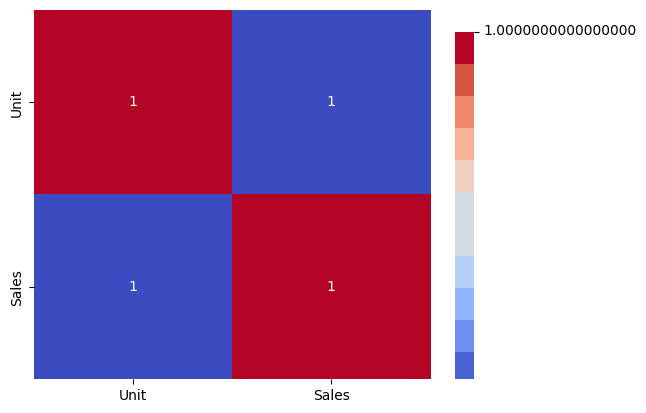

In [7]:
# Look at the correlation between the Unit and Sales columns
unit_sales_correlation = data[['Unit', 'Sales']].corr()
print("Unit and Sales Correlation:", unit_sales_correlation, sep="\n")
print("Average sales per unit:", data['Sales'].sum() / data['Unit'].sum())
# Plot the correlation matrix
sns.heatmap(data[['Unit', 'Sales']].corr(), annot=True, cmap='coolwarm')
plt.show()

### What we learnt about the data:
1. We have three categorical data:
   - States: 'WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS'
   - Times: 'Morning' 'Afternoon' 'Evening'
   - Groups: 'Kids' 'Men' 'Women' 'Seniors'
2. We have data for last quarter of 2020, Oct 1 to Dec 30 (for 90 days).
   - For each day there are 84 data points
3. We have very even distribution of data across all categories:
   - States: 1,080 data points in each state
   - Time: 2,520 data points in each Morning, Afternoon and Evening
   - Groups: 1,890 data points for each group Kids, women, men, seniors
4. No null data seen (so far, from `df.info()`)
5. `Unit` and `Sales` data has perfect correlation, each `'Sales' = 2,500 * 'Unit'`
6. Need to analyze only one of column, `Sales` or `Unit`

In [8]:
# Doublecheck: since correlation is 1, sales per unit, should be same
data['Sales_per_unit'] = data['Sales'] / data['Unit']
print(data.sample(5, random_state=42))

           Date       Time State    Group  Unit    Sales  Sales_per_unit
6882 2020-12-22  Afternoon   TAS    Women  12.0  30000.0          2500.0
6237 2020-12-15    Evening    NT      Men  10.0  25000.0          2500.0
263  2020-10-04    Evening    WA  Seniors  15.0  37500.0          2500.0
694  2020-10-09    Evening    NT    Women   7.0  17500.0          2500.0
2264 2020-10-27    Evening   TAS     Kids  13.0  32500.0          2500.0


## Data Wrangling

a. Ensure that the data is clean and free from any missing or incorrect
 - Inspect the data manually to identify missing or incorrect information using the functions `isna()` or `notna()`.

Note: The non-null count in data.info also provide info that no row data is missing. Confirming usin isna() and notna()

In [9]:
# Count NA, NaN, and null values in the data in each column
print("Column NA-Count Not-NA Count")
for col in data.columns:
    na_count = data[col].isna().sum()
    not_na_count = data[col].notna().sum()
    print(f"'{col}'\t{na_count}\t{not_na_count}")

Column NA-Count Not-NA Count
'Date'	0	7560
'Time'	0	7560
'State'	0	7560
'Group'	0	7560
'Unit'	0	7560
'Sales'	0	7560
'Sales_per_unit'	0	7560


b. Based on your knowledge of Data Analytics, include your recommendations for processing missing and incorrect data (dropping the null values or filling them).
Answer: We do not have misisng data so we will not use:
 - Default value for categorical data 'Time', 'State', 'Group'
 - Mean or other measure for numberical columns: 'Unit', 'Sales'

c. Choose a suitable Data Wrangling technique—either data standardization
or normalization. Execute the preferred normalization method and
present the resulting data. (Normalization is the preferred approach for this
problem.)

Answer: We shall use **max-min normalization** for 'Unit' and 'Sales' columns. 
We shall by creating normalized columns, as we shall use original columns below

In [10]:
# Normilize the 'Sales' column, max-min normalization
max_sales = data['Sales'].max()
min_sales = data['Sales'].min()
data['Normalized_Sales_max_min'] = (data['Sales'] - min_sales) / (max_sales - min_sales)
data['Normalized_Sales_zscore'] = stats.zscore(data['Sales'])

# Normalize the 'Unit' sold column using max-min normalization
max_units = data['Unit'].max()
min_units = data['Unit'].min()
data['Normalized_Unit_max_min'] = (data['Unit'] - min_units) / (max_units - min_units)
data['Normalized_Unit_zscore'] = stats.zscore(data['Unit'])
# Display the sample samples as above after normalization
# Print normalized data in two decimal places with commas
data_samples = data.sample(5, random_state=42).round(2)


In [11]:
# Print max-min normalized data, with sample data
# Using for loop to print the data with custom format .2f for normalized columns

print("Samples along with Max-Min Normalized columns", sep="\n")
print("Index\tUnit\tSales\tNormalized_Unit_max_min\tNormalized_Sales_max_min")

# 0: Pandas(Index=6882,
# 1: Date=Timestamp('2020-12-22 00:00:00'),
# 2: Time='Afternoon',
# 3: State='TAS',
# 4: Group='Women',
# 5: Unit=12.0,
# 6: Sales=30000.0,
# 7: Sales_per_unit=2500.0,
# 8: Normalized_Sales_max_min=0.16,
# 9: Normalized_Sales_zscore=-0.47,
# 10: Normalized_Unit_max_min=0.16,
# 11: Normalized_Unit_zscore=-0.47)

for row in data_samples.itertuples():
    print(f"{row[0]}\t{row[5]}\t{row[6]}\t\t{row[10]}\t\t\t{row[8]}")

Samples along with Max-Min Normalized columns
Index	Unit	Sales	Normalized_Unit_max_min	Normalized_Sales_max_min
6882	12.0	30000.0		0.16			0.16
6237	10.0	25000.0		0.13			0.13
263	15.0	37500.0		0.21			0.21
694	7.0	17500.0		0.08			0.08
2264	13.0	32500.0		0.17			0.17


Trying **zscore()** scaling as well in Sales and Unit columns.

In [12]:
# Print zscore normalized data
print("Samples along with zscore Normalized columns", sep="\n")
print("Index\tUnit\tSales\tNormalized_Unit_zscore\tNormalized_Sales_zscore")

for row in data_samples.itertuples():
    print(f"{row[0]}\t{row[5]}\t{row[6]}\t\t{row[11]}\t\t\t{row[9]}")

Samples along with zscore Normalized columns
Index	Unit	Sales	Normalized_Unit_zscore	Normalized_Sales_zscore
6882	12.0	30000.0		-0.47			-0.47
6237	10.0	25000.0		-0.62			-0.62
263	15.0	37500.0		-0.23			-0.23
694	7.0	17500.0		-0.85			-0.85
2264	13.0	32500.0		-0.39			-0.39


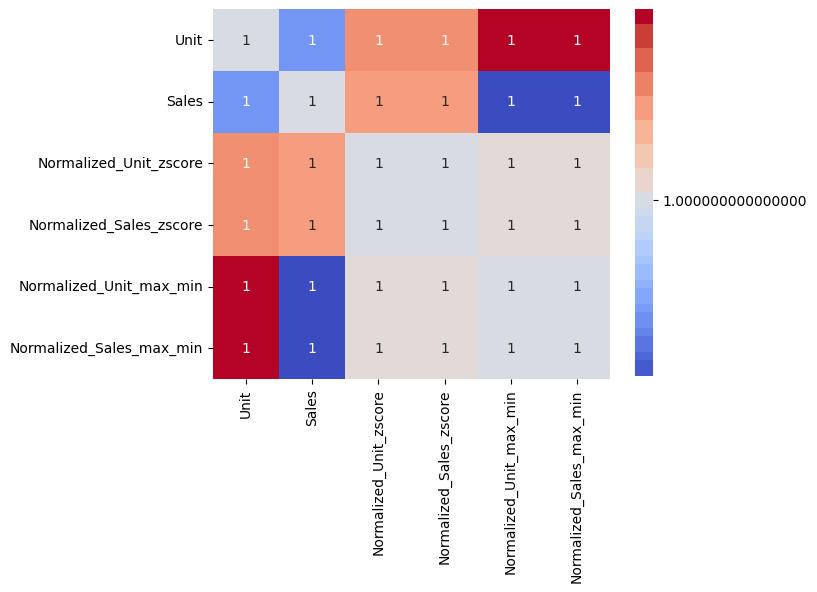

In [13]:
# Print the correlation matrix before and after normalization
numerical_columns = ['Unit', 'Sales']
numerical_columns += ['Normalized_Unit_zscore','Normalized_Sales_zscore',
                      'Normalized_Unit_max_min', 'Normalized_Sales_max_min']
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

d. Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.

Answer:
We shall look at the sales descriptive stats by :
 - 'State': [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
 - 'Time': [' Morning' ' Afternoon' ' Evening']
 - 'Group': ['Kids' ' Men' ' Women' ' Seniors']


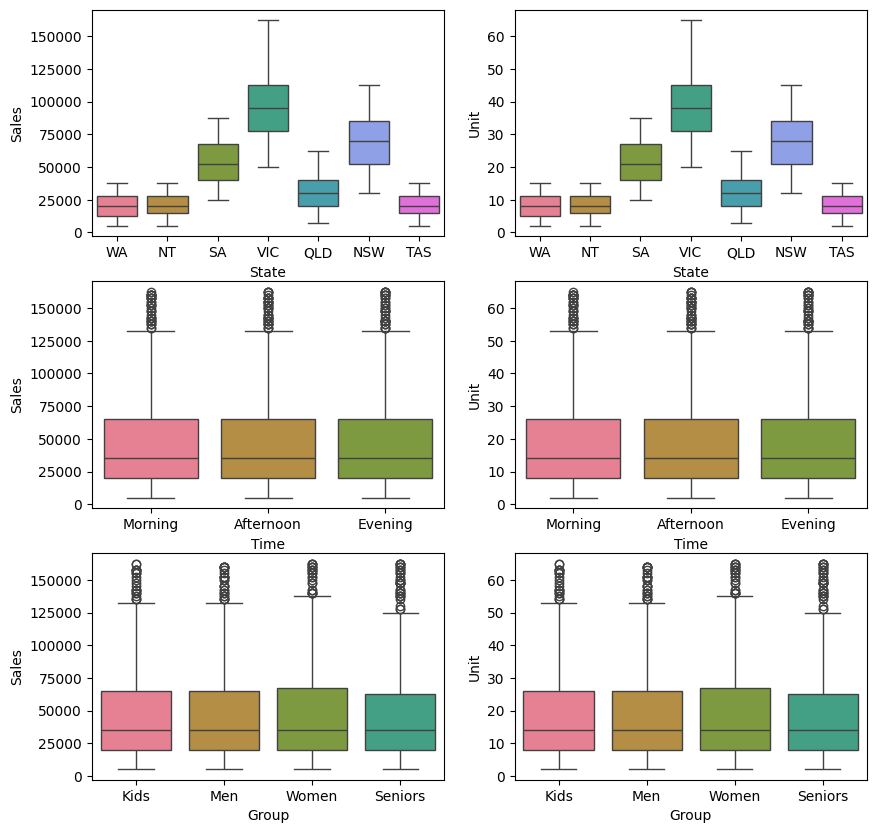

In [14]:
# Boxplot for Sales and Unit by State, Time and Group
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
colors = sns.color_palette("husl", 7)
sns.boxplot(x='State', y='Sales', data=data, ax=axs[0,0], palette=colors, hue='State')
sns.boxplot(x='State', y='Unit', data=data, ax=axs[0,1], palette=colors, hue='State')
sns.boxplot(x='Time', y='Sales', data=data, ax=axs[1,0], palette=colors[:3], hue='Time')
sns.boxplot(x='Time', y='Unit', data=data, ax=axs[1, 1], palette=colors[:3], hue='Time')
sns.boxplot(x='Group', y='Sales', data=data, ax=axs[2,0], palette=colors[:4], hue='Group')
sns.boxplot(x='Group', y='Unit', data=data, ax=axs[2, 1], palette=colors[:4], hue='Group')
plt.show()

In [15]:
# Total sales by Month
monthly_sales = data[['Unit', 'Sales']].groupby(data['Date'].dt.to_period('M')).sum()
print("Monthly sales:")
print(monthly_sales)
# Totals units sold and sales
total_units = data['Unit'].sum()
total_sales = data['Sales'].sum()
print("--------------------------------")
print(f"Total: {total_units:,.1f}", end=" ")
print(f"${total_sales:,.1f}")

Monthly sales:
            Unit        Sales
Date                         
2020-10  45716.0  114290000.0
2020-11  36273.0   90682500.0
2020-12  54132.0  135330000.0
--------------------------------
Total: 136,121.0 $340,302,500.0


In [16]:
# Print total count, units and sales by State
state_total = data[['State', 'Unit', 'Sales']].groupby('State').sum().sort_values(by='Sales', ascending=False)
print("Total count, units and sales by State:", state_total, sep="\n")

Total count, units and sales by State:
          Unit        Sales
State                      
VIC    42226.0  105565000.0
NSW    29988.0   74970000.0
SA     23543.0   58857500.0
QLD    13367.0   33417500.0
TAS     9104.0   22760000.0
NT      9032.0   22580000.0
WA      8861.0   22152500.0


In [17]:
# Print total count, units and sales by Time
time_total = data[['Time', 'Unit', 'Sales']].groupby('Time').sum()
print("Total count, units and sales by Time:", time_total, sep="\n")

Total count, units and sales by Time:
              Unit        Sales
Time                           
Afternoon  45603.0  114007500.0
Evening    44835.0  112087500.0
Morning    45683.0  114207500.0


In [18]:
# Print total count, units and sales by Group
group_total = data[['Group', 'Unit', 'Sales']].groupby('Group').sum()
print("Total count, units and sales by Group:", group_total, sep="\n")

Total count, units and sales by Group:
            Unit       Sales
Group                       
Kids     34029.0  85072500.0
Men      34300.0  85750000.0
Seniors  33615.0  84037500.0
Women    34177.0  85442500.0


In [19]:
daily_state_time = data[['Date', 'State', 'Time', 'Unit', 'Sales']].groupby(
    ['State', 'Date', 'Time']).sum().reset_index()
print("Daily count, units and sales by State and Time:")
daily_state_time.head(6)

Daily count, units and sales by State and Time:


,State,Date,Time,Unit,Sales
0,NSW,2020-10-01,Afternoon,136.0,340000.0
1,NSW,2020-10-01,Evening,102.0,255000.0
2,NSW,2020-10-01,Morning,113.0,282500.0
3,NSW,2020-10-02,Afternoon,125.0,312500.0
4,NSW,2020-10-02,Evening,113.0,282500.0
5,NSW,2020-10-02,Morning,102.0,255000.0


In [20]:
daily_state_time_mean = daily_state_time[['State', 'Time', 'Unit', 'Sales']].groupby(['State', 'Time']).mean()
print("Daily average sales count, units and sales by State and Time:")
print(daily_state_time_mean)

Daily average sales count, units and sales by State and Time:
                       Unit          Sales
State Time                                
NSW   Afternoon  111.600000  279000.000000
      Evening    109.833333  274583.333333
      Morning    111.766667  279416.666667
NT    Afternoon   33.377778   83444.444444
      Evening     33.900000   84750.000000
      Morning     33.077778   82694.444444
QLD   Afternoon   50.433333  126083.333333
      Evening     47.255556  118138.888889
      Morning     50.833333  127083.333333
SA    Afternoon   89.000000  222500.000000
      Evening     86.077778  215194.444444
      Morning     86.511111  216277.777778
TAS   Afternoon   34.088889   85222.222222
      Evening     33.622222   84055.555556
      Morning     33.444444   83611.111111
VIC   Afternoon  155.833333  389583.333333
      Evening    155.022222  387555.555556
      Morning    158.322222  395805.555556
WA    Afternoon   32.366667   80916.666667
      Evening     32.455556   81138

In [21]:
# Daily Mean Sales by State and Time
daily_state_group = data[['Date', 'State', 'Group', 'Unit', 'Sales']].groupby(
    ['State', 'Date', 'Group']).sum().reset_index()
state_group_mean = daily_state_group[['State', 'Group', 'Unit', 'Sales']].groupby(['State', 'Group']).mean()
print("Mean count, units and sales by State and Group:",
      state_group_mean[:12].round(2), sep="\n")

Mean count, units and sales by State and Group:
                Unit      Sales
State Group                    
NSW   Kids     82.61  206527.78
      Men      84.54  211361.11
      Seniors  80.83  202083.33
      Women    85.21  213027.78
NT    Kids     25.33   63333.33
      Men      25.61   64027.78
      Seniors  24.29   60722.22
      Women    25.12   62805.56
QLD   Kids     37.82   94555.56
      Men      37.30   93250.00
      Seniors  36.40   91000.00
      Women    37.00   92500.00


In [22]:
# Printing the last 12 rows of the dataframe
print("Mean count, units and sales by State and Group:", state_group_mean[12:].round(2), sep="\n")

Mean count, units and sales by State and Group:
                 Unit      Sales
State Group                     
SA    Kids      64.51  161277.78
      Men       65.13  162833.33
      Seniors   65.41  163527.78
      Women     66.53  166333.33
TAS   Kids      25.67   64166.67
      Men       25.59   63972.22
      Seniors   25.11   62777.78
      Women     24.79   61972.22
VIC   Kids     117.16  292888.89
      Men      117.37  293416.67
      Seniors  116.96  292388.89
      Women    117.70  294250.00
WA    Kids      25.00   62500.00
      Men       25.57   63916.67
      Seniors   24.50   61250.00
      Women     23.39   58472.22


### 1d. Insights on Sales
1. The daily sales are steady in a daily basis:
   - The mean-sales is similar across all times in the day (in any region)
   - The mean-sales is similar across all groups in the day (in any region)
2. The daily sales had a drop in Nov. Need to compare with past data if that is cyclical.
3. There was no missing data or N/A data
4. The absolute sales by volume are in ranked by cities as:
    - Top two markets are: VIC, NSW
    - Botton two are: NT, WA
5. For market penetration analsis we should look at sales per 100K of users

#  Data analysis
a. Perform descriptive statistical analysis on the data in the Sales and Unit
columns. Utilize techniques such as mean, median, mode, and standard
deviation for this analysis.

**Asnwer**:
In this section we will look at __per day__:
1. Descriptive statistics (count, mean, std. dev, min/max and quartiles) by:
   - Each state sales (how stats are different) daily
   - Each state units sold daily
   - Each group units sold daily
   - Each time category sales daily
   - Each time category units sold daily

In [23]:
# Get daily stats for all states
sales_units_daily = data[['Date', 'Unit', 'Sales']].groupby('Date').sum()
print("Daily Sales and Units:")
print(sales_units_daily.head(5))

Daily Sales and Units:
              Unit      Sales
Date                         
2020-10-01  1488.0  3720000.0
2020-10-02  1486.0  3715000.0
2020-10-03  1556.0  3890000.0
2020-10-04  1488.0  3720000.0
2020-10-05  1545.0  3862500.0


In [24]:
def get_daily_descriptive_stats(group_by, unit_or_sales):
    """Gets descriptive stats for daily data by group_by and unit_or_sales
        in a dataframe. Helps in consolidating data for daily stats
    Args:
        group_by (_type_): Either 'State' or 'Group'
        unit_or_sales (_type_): Either 'Unit' or 'Sales'

    Returns:
        _type_: Dataframe with descriptive stats for daily data
    """
    daily_data = data[['Date', unit_or_sales, group_by]
                      ].groupby([group_by, 'Date']).sum()
    descritive_index = ['count', 'mean', 'std',
                        'min', '25%', '50%', '75%', 'max']
    # Create a dataframe to hold descriptive stats
    state_descriptive_stats = pd.DataFrame(index=descritive_index)
    columns = [] # List to hold column names
    for state in daily_data.index.get_level_values(0).unique():
        columns.append(state)
        desc = daily_data.loc[state].describe()
        state_descriptive_stats = pd.merge(
            state_descriptive_stats, desc, left_index=True, right_index=True, suffixes=(f'{state}', f'{state}'))
    state_descriptive_stats.columns = columns
    return state_descriptive_stats

In [25]:
# Get descriptive stats for daily data by State and Sales
state_descriptive_stats = get_daily_descriptive_stats('State', 'Sales')
print("Daily descriptive 'Sales' stats for daily data by State:")
print(state_descriptive_stats.round(0))

Daily descriptive 'Sales' stats for daily data by State:
             NSW        NT       QLD        SA       TAS        VIC        WA
count       90.0      90.0      90.0      90.0      90.0       90.0      90.0
mean    833000.0  250889.0  371306.0  653972.0  252889.0  1172944.0  246139.0
std     118864.0   61278.0   92653.0  112835.0   58978.0   200850.0   58617.0
min     595000.0  130000.0  205000.0  460000.0  135000.0   867500.0  137500.0
25%     748125.0  190000.0  295625.0  545000.0  210625.0  1002500.0  188125.0
50%     838750.0  260000.0  362500.0  671250.0  260000.0  1122500.0  256250.0
75%     910000.0  301875.0  460000.0  740000.0  300000.0  1351250.0  290000.0
max    1102500.0  362500.0  540000.0  860000.0  370000.0  1595000.0  360000.0


In [26]:
# Get descriptive stats for daily data by Group and Sales
group_sales_descriptive_stats = get_daily_descriptive_stats('Group', 'Sales')
print("Daily descriptive 'Sales' stats for daily data by Group:")
print(group_sales_descriptive_stats.round(2))

Daily descriptive 'Sales' stats for daily data by Group:
             Kids         Men     Seniors       Women
count       90.00       90.00       90.00       90.00
mean    945250.00   952777.78   933750.00   949361.11
std     160529.34   169956.39   160047.94   170205.41
min     672500.00   640000.00   597500.00   657500.00
25%     793125.00   792500.00   778125.00   792500.00
50%     957500.00   957500.00   958750.00   930000.00
75%    1073750.00  1085000.00  1063750.00  1113125.00
max    1272500.00  1275000.00  1187500.00  1255000.00


In [27]:
# Get descriptive stats for daily data by State and Unit
unit_descriptive_stats = get_daily_descriptive_stats('State', 'Unit')
print("Daily descriptive 'Unit' stats for daily data by State:")
print(unit_descriptive_stats.round(2))

Daily descriptive 'Unit' stats for daily data by State:
          NSW      NT     QLD      SA     TAS     VIC      WA
count   90.00   90.00   90.00   90.00   90.00   90.00   90.00
mean   333.20  100.36  148.52  261.59  101.16  469.18   98.46
std     47.55   24.51   37.06   45.13   23.59   80.34   23.45
min    238.00   52.00   82.00  184.00   54.00  347.00   55.00
25%    299.25   76.00  118.25  218.00   84.25  401.00   75.25
50%    335.50  104.00  145.00  268.50  104.00  449.00  102.50
75%    364.00  120.75  184.00  296.00  120.00  540.50  116.00
max    441.00  145.00  216.00  344.00  148.00  638.00  144.00


In [28]:
# Get descriptive stats for daily data by Group and Unit
group_unit_descriptive_stats = get_daily_descriptive_stats('Group', 'Unit')
print("Daily descriptive 'Unit' stats for daily data by Group:")
print(group_unit_descriptive_stats.round(2))

Daily descriptive 'Unit' stats for daily data by Group:
         Kids     Men  Seniors   Women
count   90.00   90.00    90.00   90.00
mean   378.10  381.11   373.50  379.74
std     64.21   67.98    64.02   68.08
min    269.00  256.00   239.00  263.00
25%    317.25  317.00   311.25  317.00
50%    383.00  383.00   383.50  372.00
75%    429.50  434.00   425.50  445.25
max    509.00  510.00   475.00  502.00


In [29]:
# Get descriptive stats for daily data by Time and Sales
daily_time_sales_stats = get_daily_descriptive_stats('Time', 'Sales')
print(daily_time_sales_stats.round(2))

        Afternoon     Evening     Morning
count       90.00       90.00       90.00
mean   1266750.00  1245416.67  1268972.22
std     220617.57   214158.02   220883.34
min     922500.00   852500.00   872500.00
25%    1070625.00  1026250.00  1049375.00
50%    1241250.00  1293750.00  1280000.00
75%    1482500.00  1420000.00  1452500.00
max    1780000.00  1605000.00  1687500.00


In [30]:
# Get descriptive stats for daily data by Time and Unir
daily_time_unit_stats = get_daily_descriptive_stats('Time', 'Unit')
print("Daily descriptive 'Unit' stats for daily data by Time:")
print(daily_time_unit_stats.round(2))

Daily descriptive 'Unit' stats for daily data by Time:
       Afternoon  Evening  Morning
count      90.00    90.00    90.00
mean      506.70   498.17   507.59
std        88.25    85.66    88.35
min       369.00   341.00   349.00
25%       428.25   410.50   419.75
50%       496.50   517.50   512.00
75%       593.00   568.00   581.00
max       712.00   642.00   675.00


b. Identify the group with the highest sales and the group with the lowest
sales based on the data provided.

**Answer**:
 - The sales by group are almost same within 0.5% range
 - The order highest to lowest is shown below, with `Men` sales being #1
 - The lowest sales is by `Seniors`

In [31]:
# Sales by Group
group_sales = data.groupby('Group')['Sales'].sum()
print("Sales by Group:", group_sales.sort_values(ascending=False))

Sales by Group: Group
Men        85750000.0
Women      85442500.0
Kids       85072500.0
Seniors    84037500.0
Name: Sales, dtype: float64


c. Identify the group with the highest and lowest “unit” based on the data
provided.

**Answer**:
 - The unit sales order (is similar to Sales, cince corr=1.0)
 - The results are shown below:
   - Men 34,300 units sold in whole quarter
   - Seniors (least) 33,615 units sold in whole quarter

In [32]:
group_unit = data.groupby('Group')['Unit'].sum()
print("Unit by Group:", group_unit.sort_values(ascending=False))

Unit by Group: Group
Men        34300.0
Women      34177.0
Kids       34029.0
Seniors    33615.0
Name: Unit, dtype: float64


d. Generate weekly, monthly, and quarterly reports to document and
present the results of the analyses conducted.

Remark: you don’t have to use graphs in this question. You can
create dataframes that contain your results.
Examples of analyses that you can conduct are:
- Compute the total sales for each week, month and quarter
- Compute the total number of units sold for each week, month and
quarter

In [33]:
# Create sales by week, month and quarter
sales_by_week = data.groupby(data['Date'].dt.to_period('W'))['Sales'].sum()
sales_by_month = data.groupby(data['Date'].dt.to_period('M'))['Sales'].sum()
sales_by_quarter = data.groupby(data['Date'].dt.to_period('Q'))['Sales'].sum()
# Create units by week, month and quarter
units_by_week = data.groupby(data['Date'].dt.to_period('W'))['Unit'].sum()
units_by_month = data.groupby(data['Date'].dt.to_period('M'))['Unit'].sum()
units_by_quarter = data.groupby(data['Date'].dt.to_period('Q'))['Unit'].sum()

weekly_sales = pd.DataFrame({'Sales': sales_by_week, 'Units': units_by_week})
monthly_sales = pd.DataFrame({'Sales': sales_by_month, 'Units': units_by_month})
quarterly_sales = pd.DataFrame({'Sales': sales_by_quarter, 'Units': units_by_quarter})

print("Sales by Week:")
print(weekly_sales)

Sales by Week:
                            Sales    Units
Date                                      
2020-09-28/2020-10-04  15045000.0   6018.0
2020-10-05/2020-10-11  27002500.0  10801.0
2020-10-12/2020-10-18  26640000.0  10656.0
2020-10-19/2020-10-25  26815000.0  10726.0
2020-10-26/2020-11-01  21807500.0   8723.0
2020-11-02/2020-11-08  20865000.0   8346.0
2020-11-09/2020-11-15  21172500.0   8469.0
2020-11-16/2020-11-22  21112500.0   8445.0
2020-11-23/2020-11-29  21477500.0   8591.0
2020-11-30/2020-12-06  29622500.0  11849.0
2020-12-07/2020-12-13  31525000.0  12610.0
2020-12-14/2020-12-20  31655000.0  12662.0
2020-12-21/2020-12-27  31770000.0  12708.0
2020-12-28/2021-01-03  13792500.0   5517.0


In [34]:
print("Sales by Month:")
print(monthly_sales)

Sales by Month:
               Sales    Units
Date                         
2020-10  114290000.0  45716.0
2020-11   90682500.0  36273.0
2020-12  135330000.0  54132.0


In [35]:
print("Sales by Quarter:")
print(quarterly_sales)

Sales by Quarter:
              Sales     Units
Date                         
2020Q4  340302500.0  136121.0


- Compute the total sales for each week, month and quarter, for each
group separately, or for each state separately

**Answer:** See below:

In [36]:
# Create sales by week, month and quarter for each group
sales_by_week_group = data.groupby(['Group', data['Date'].dt.to_period('W')])['Sales'].sum()
sales_by_month_group = data.groupby(['Group', data['Date'].dt.to_period('M')])['Sales'].sum()
sales_by_quarter_group = data.groupby(['Group', data['Date'].dt.to_period('Q')])['Sales'].sum()
print("Sales by Week Group:")
print(sales_by_week_group)


Sales by Week Group:
Group    Date                 
Kids     2020-09-28/2020-10-04    3690000.0
         2020-10-05/2020-10-11    7020000.0
         2020-10-12/2020-10-18    6707500.0
         2020-10-19/2020-10-25    6525000.0
         2020-10-26/2020-11-01    5490000.0
         2020-11-02/2020-11-08    5125000.0
         2020-11-09/2020-11-15    5315000.0
         2020-11-16/2020-11-22    5302500.0
         2020-11-23/2020-11-29    5577500.0
         2020-11-30/2020-12-06    7362500.0
         2020-12-07/2020-12-13    8030000.0
         2020-12-14/2020-12-20    7765000.0
         2020-12-21/2020-12-27    7630000.0
         2020-12-28/2021-01-03    3532500.0
Men      2020-09-28/2020-10-04    3730000.0
         2020-10-05/2020-10-11    6807500.0
         2020-10-12/2020-10-18    6710000.0
         2020-10-19/2020-10-25    6872500.0
         2020-10-26/2020-11-01    5507500.0
         2020-11-02/2020-11-08    5335000.0
         2020-11-09/2020-11-15    5242500.0
         2020-11-16/2020

In [37]:
print("Sales by Month Group:")
print(sales_by_month_group)


Sales by Month Group:
Group    Date   
Kids     2020-10    28635000.0
         2020-11    22882500.0
         2020-12    33555000.0
Men      2020-10    28885000.0
         2020-11    22615000.0
         2020-12    34250000.0
Seniors  2020-10    28565000.0
         2020-11    22322500.0
         2020-12    33150000.0
Women    2020-10    28205000.0
         2020-11    22862500.0
         2020-12    34375000.0
Name: Sales, dtype: float64


In [38]:
print("Sales by Quarter Group:")
print(sales_by_quarter_group)

Sales by Quarter Group:
Group    Date  
Kids     2020Q4    85072500.0
Men      2020Q4    85750000.0
Seniors  2020Q4    84037500.0
Women    2020Q4    85442500.0
Name: Sales, dtype: float64


- Compute the mean, median, std of sales for each week, month and
quarter

**Answer:**
The calculations below is average sale of at state for any-group at any-time-period. So:
  - For the week of 2020-09-28/2020-10-04: $44,776 in sales was generated on average in a city by-a-group in any-time-period
  - Over the quarter on average this number was $45,013

In [39]:
# Mean, median, std of sales for each week, month and quarter
# The weekly mean is average sales for a state/group/time in a week
sales_by_week_mean = data.groupby(data['Date'].dt.to_period('W'))['Sales'].mean()
sales_by_month_mean = data.groupby(data['Date'].dt.to_period('M'))['Sales'].mean()
sales_by_quarter_mean = data.groupby(data['Date'].dt.to_period('Q'))['Sales'].mean()
print("Sales by Week Mean:")
print(sales_by_week_mean)


Sales by Week Mean:
Date
2020-09-28/2020-10-04    44776.785714
2020-10-05/2020-10-11    45922.619048
2020-10-12/2020-10-18    45306.122449
2020-10-19/2020-10-25    45603.741497
2020-10-26/2020-11-01    43268.849206
2020-11-02/2020-11-08    35484.693878
2020-11-09/2020-11-15    36007.653061
2020-11-16/2020-11-22    35905.612245
2020-11-23/2020-11-29    36526.360544
2020-11-30/2020-12-06    50378.401361
2020-12-07/2020-12-13    53613.945578
2020-12-14/2020-12-20    53835.034014
2020-12-21/2020-12-27    54030.612245
2020-12-28/2021-01-03    54732.142857
Freq: W-SUN, Name: Sales, dtype: float64


In [40]:

print("Sales by Month Mean:")
print(sales_by_month_mean)

Sales by Month Mean:
Date
2020-10    45353.174603
2020-11    35985.119048
2020-12    53702.380952
Freq: M, Name: Sales, dtype: float64


In [41]:
print("Sales by Quarter Mean:")
print(sales_by_quarter_mean)

Sales by Quarter Mean:
Date
2020Q4    45013.558201
Freq: Q-DEC, Name: Sales, dtype: float64


# Data visualization
- Use suitable data visualization libraries to construct a dashboard for the
Head of Sales and Marketing (S&M). The dashboard should encompass key parameters
- Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.
- Time-of-the-Day Analysis: Identify peak and off-peak sales periods
to facilitate strategic planning for S&M teams. This information aids
in designing programs like hyper-personalization and Next Best
Offers to enhance sales.

**Answer**: See analysis below:
1. Daily Sales and Unit sales for whole region

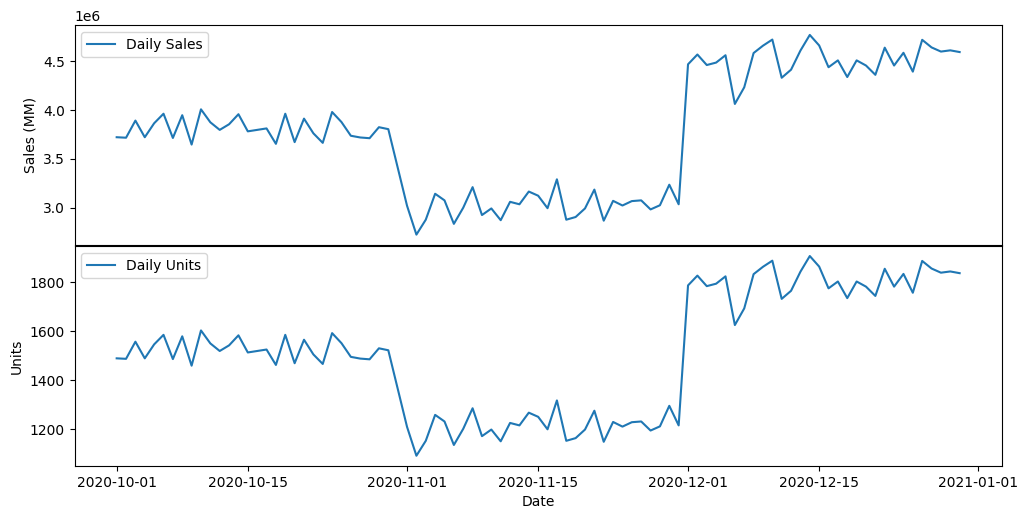

In [42]:
# 1. Daily Sales and Unit sales for whole region

# compute the total number of units sold for each data and
# the total revenue for each date, using groupby.
daily_sales = data.groupby('Date')['Sales'].sum()
daily_units = data.groupby('Date')['Unit'].sum()
# Plot the daily sales and units
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
fig.tight_layout(h_pad=-2)  # No vertical space between the plots
axs[0].plot(daily_sales, label='Daily Sales')
# Ignore x-axis labels for the first plot
axs[0].set_xticks([])
axs[0].set_ylabel('Sales (MM)')
axs[0].legend()
axs[1].plot(daily_units, label='Daily Units')
axs[1].legend()
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Units')
plt.show()

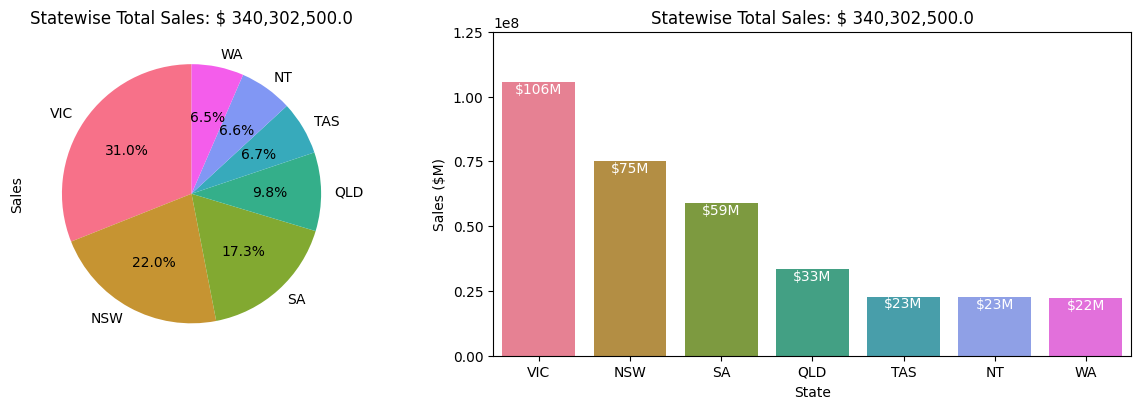

In [43]:
# Plot the statewise total sales pie chart
# Use inbuilt datframe to plot the pie chart
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
colors = sns.color_palette("husl", 7)
state_total['Sales'].plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axs[0], colors=colors)
axs[0].set_title(f'Statewise Total Sales: $ {state_total["Sales"].sum():,.1f}')
# horizontal space between the plots
fig.tight_layout(h_pad=2)
# Use SNS to plot the pie chart
sns.barplot(x='State', y='Sales', data=state_total,
            order=state_total.index, ax=axs[1], label='Sales', palette=colors, hue='State')
axs[1].set_title(f'Statewise Total Sales: $ {state_total["Sales"].sum():,.1f}')
# Set y-axis units to $M and ticks to 1M
axs[1].set_ylabel('Sales ($M)')
axs[1].set_yticks([0, 25_000_000, 50_000_000, 75_000_000, 100_000_000, 125_000_000])
# add text to the bars
for i, v in enumerate(state_total['Sales']):
    axs[1].text(i, v, f'${v/1000000:,.0f}M', ha='center', va='top', color='white')
plt.show()

In [44]:
state_descriptive_stats.loc['mean'].round(2)

NSW     833000.00
NT      250888.89
QLD     371305.56
SA      653972.22
TAS     252888.89
VIC    1172944.44
WA      246138.89
Name: mean, dtype: float64

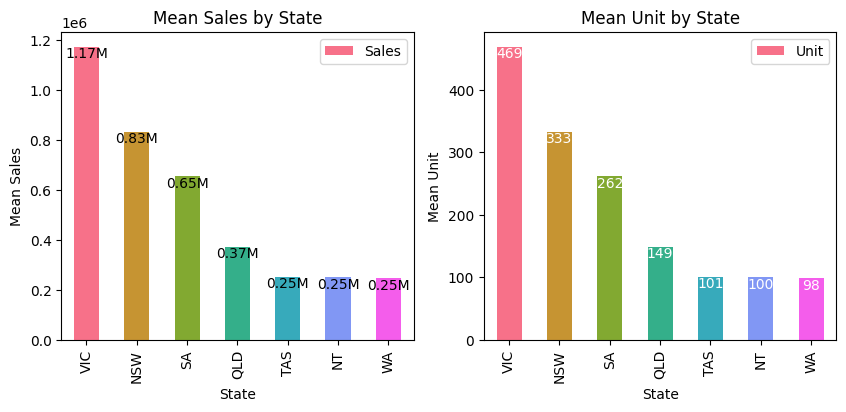

In [45]:
# Get two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
colors = sns.color_palette("husl", 7)
# Plot Sales
state_descriptive_stats.loc['mean'].sort_values(ascending=False).plot(kind='bar', label='Sales',
                       title='Mean Sales by State', ax=axs[0], color=colors)
axs[0].set_xlabel('State')
axs[0].set_ylabel('Mean Sales')
# add text to the bars
for i, v in enumerate(state_descriptive_stats.loc['mean'].sort_values(ascending=False)):
    axs[0].text(i, v, f'{v/1000000:.2f}M', ha='center', va='top', color='black')
axs[0].legend()
# Plot Unit
unit_descriptive_stats.loc['mean'].sort_values(ascending=False).plot(kind='bar', label='Unit',
                      title='Mean Unit by State', ax=axs[1], color=colors)
axs[1].set_xlabel('State')
axs[1].set_ylabel('Mean Unit')
for i, v in enumerate(unit_descriptive_stats.loc['mean'].sort_values(ascending=False)):
    axs[1].text(i, v, f'{v:.0f}', ha='center', va='top', color='white')
axs[1].legend()
plt.show()

- Time-of-the-Day Analysis: Identify peak and off-peak sales periods
to facilitate strategic planning for S&M teams. This information aids
in designing programs like hyper-personalization and Next Best
Offers to enhance sales.

**Answer**
1. Time of day analysis done overall quarterly sales
    - Sales across time of day is almost same (Morning > Afternoon > Evening)
2. Plotted for each state by time of day

Sales by Time: Time
Afternoon    114007500.0
Evening      112087500.0
Morning      114207500.0
Name: Sales, dtype: float64


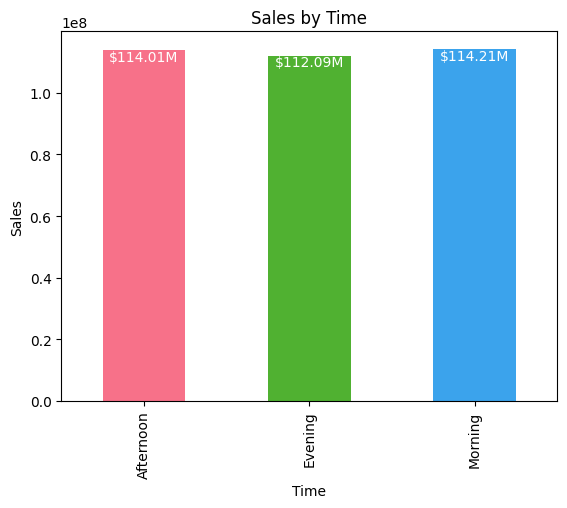

In [46]:
# Sales by Time
time_sales = data.groupby('Time')['Sales'].sum()
colors = sns.color_palette("husl", 3)
print("Sales by Time:", time_sales)
# Plot Sales by Time
time_sales.plot(kind='bar', label='Sales',
                title='Sales by Time',
                xlabel="Time",
                ylabel="Sales", color=colors)
# Add text to the bars
for i, v in enumerate(time_sales):
    plt.text(i, v, f'${v/1000000:,.2f}M', ha='center', va='top', color='white')
plt.show()

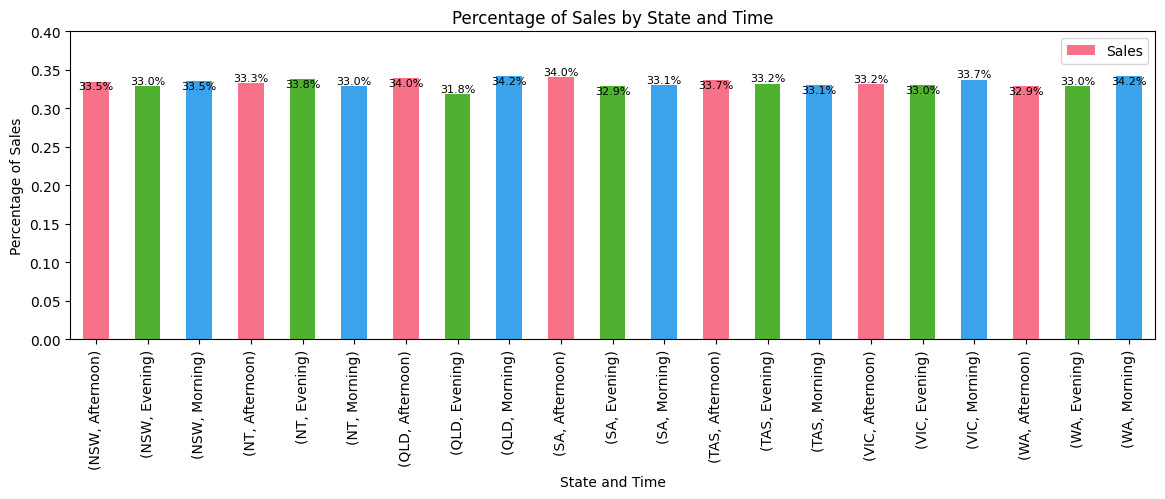

In [47]:
# For each state calculate the percentage of sales by Time
state_time_sales_percentages = data.groupby(['State', 'Time'])['Sales'].sum() / data.groupby('State')['Sales'].sum()
# Plot the percentage of sales by State and Time
fig, axs = plt.subplots(1, 1, figsize=(14, 4))
colors = sns.color_palette("husl", 3) * 7
state_time_sales_percentages.plot(kind='bar',
                                   title='Percentage of Sales by State and Time',
                                   ax=axs, color=colors)
# Label the bars with the percentage of sales vertically
for i, v in enumerate(state_time_sales_percentages):
    location = "top" if i % 2 == 0 else "bottom"
    axs.text(i, v, f'{v:.1%}', ha='center', va=location, fontsize=8)
axs.set_ylim(0, 0.4)
axs.set_xlabel('State and Time')
axs.set_ylabel('Percentage of Sales')
axs.legend(bbox_to_anchor=(1, 1))
plt.show()

- State-wise Sales Analysis for Different Demographic Groups (Kids,
Women, Men, and Seniors).

**Answer**
1. Total Quarterly Sales plotted by for each Group.
    - Sales across group is almost same
2. Total quarterly sales plotted by each group in each state
    - The behavior in each group across state is similar

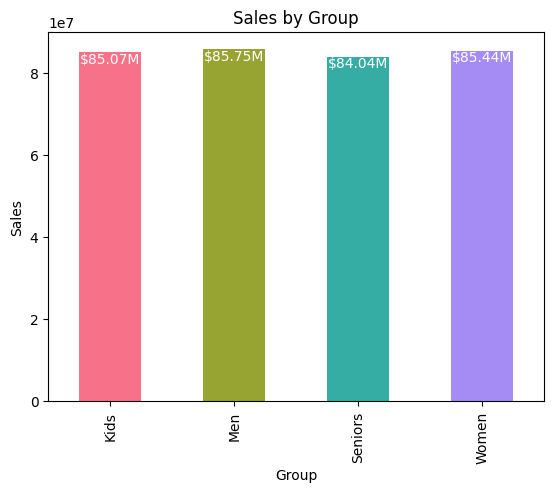

In [48]:
# Sales by Group
group_sales = data.groupby('Group')['Sales'].sum()
colors = sns.color_palette("husl", 4)
# Plot Sales by Group
group_sales.plot(kind='bar', label='Sales',
                 title='Sales by Group',
                 xlabel="Group",
                 ylabel="Sales", color=colors)
# Add text to the bars
for i, v in enumerate(group_sales):
    plt.text(i, v, f'${v/1000000:,.2f}M',
             ha='center', va='top', color='white')
plt.show()

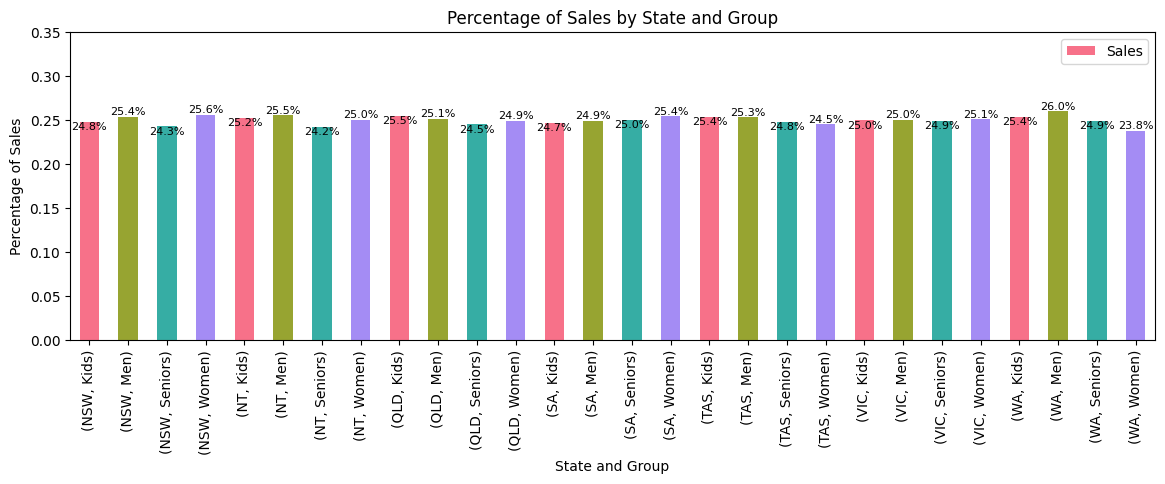

In [49]:
# For each state calculate the percentage of sales by Group
state_group_sales_percentages = data.groupby(
    ['State', 'Group'])['Sales'].sum() / data.groupby('State')['Sales'].sum()
# Plot the percentage of sales by State and Group
fig, axs = plt.subplots(1, 1, figsize=(14, 4))
colors = sns.color_palette("husl", 4) * 7
state_group_sales_percentages.plot(kind='bar', label='Sales',
                                   title='Percentage of Sales by State and Group',
                                   ax=axs, color=colors)
# Label the bars with the percentage of sales vertically
for i, v in enumerate(state_group_sales_percentages):
    location = "top" if i % 2 == 0 else "bottom"
    axs.text(i, v, f'{v:.1%}', ha='center', va=location, fontsize=8)
axs.set_ylim(0, 0.35)
axs.set_xlabel('State and Group')
axs.set_ylabel('Percentage of Sales')
# Add legend as Group
axs.legend()
plt.show()

- c. Include your recommendation and indicate why you are choosing the
recommended visualization package.
Remark: matplotlib or seaborn

**Answer**
The plots for this problem are bar charts, pie or line graphs. So used:
1. DataFrame inbuilt plot (that uses matplotlib) whereever applicable
2. Uses seaborn for color pallets for each of use, that works well with matplotlib

# Observations

 - The dataset is fairly clean:
    - with no missing data (no N/A)
    - Daily data exists for all States, Groups and Time
    - Only mising day is Dec 31 for the quarter
 - The data has moderate variability in daily stats (coefficient or variation < 25%)
 - The correlation in Unit and Sales is perfect
 - Sales per state
    - Max sales are in states: VIC and NSW
    - Lower sales regions are: TAS, NT, QA
    - Sales per capita: will provide additional insights
 - Sales by Time of day:
    - Not much variability in Morning, Afternoon and Evening
    - Not much variability in sales by Group
